In [3]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import wordcloud
import datetime

In [2]:
yt_df=pd.read_csv('D:\Data Analytics Real World Project Python\Youtube Trending Analysis/USvideos.csv')
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
PLOT_COLORS=["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

In [5]:
pd.options.display.float_format='{:.2f}'.format

In [6]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [8]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [9]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [12]:
# we can see there are 40949 entries in the dataset. no-null entries except description 40379 non-null value

# 1. Data cleaning : the description column has some null value. These are some of the rows whose discription are null.

yt_df['description'].isna().sum()

570

In [14]:
yt_df[yt_df['description'].isna()].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


In [15]:
# to do some sort of data cleaning, and to get rid of those null values, we put an empty string
yt_df['description']=yt_df['description'].fillna(value="")

In [19]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [24]:
# Data collection years

# let's see in which years the dataset was collected

yt_df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)


2018   0.77
2017   0.23
Name: trending_date, dtype: float64

In [25]:
# we can see that the dataset was collect in 2017 and 2018 with 77% of it in 2018 and 23% in 2017

# Dsscriber of numberical columns

yt_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


In [26]:
#The average number of views of a trending video is 2,360,784.
#The median value for the number of views is 681,861, 
#which means that half the trending videos have views that are less than that number,
#and the other half have views larger than that number
# the average liks of a trending video is 74266.70 while the average number of dislikes is 3711.40
# Average comment_count of trending video is 8446.80 while the median is 1856.00


c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


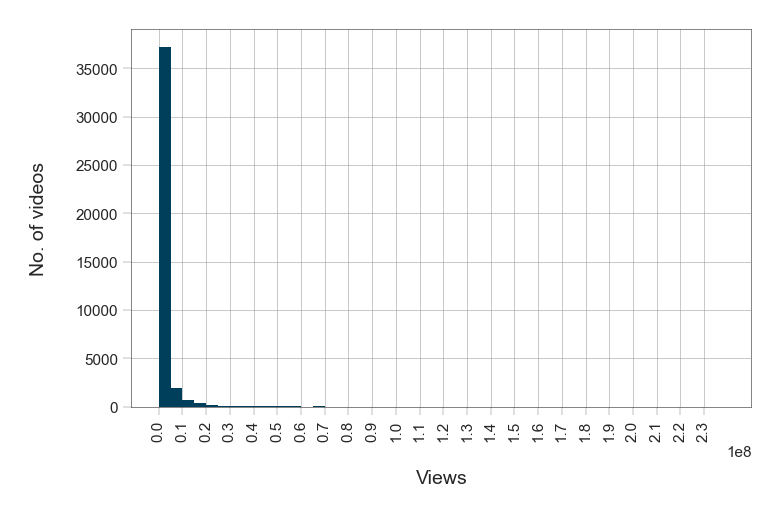

In [31]:
#views histogram
fig, ax = plt.subplots()
_ = sns.distplot(yt_df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


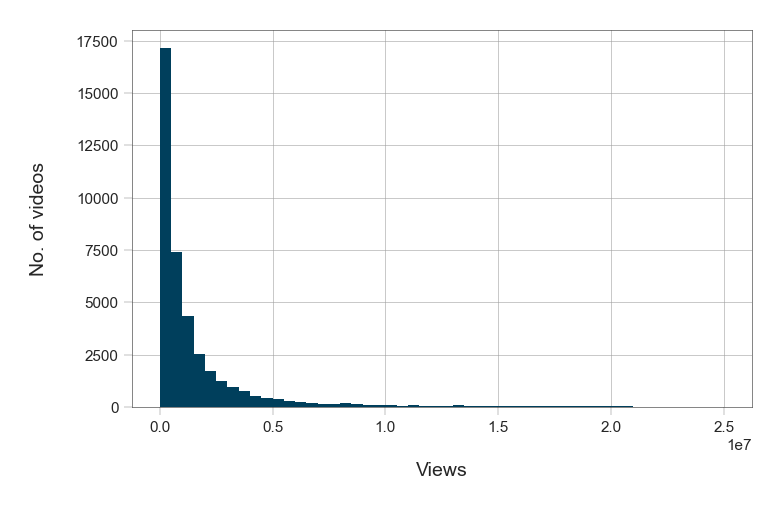

In [33]:
fig, ax = plt.subplots()
_ = sns.distplot(yt_df[yt_df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [36]:
# the majority of trending videos have 1 milioon views or less
yt_df[yt_df['views']<1e6]['views'].count()/yt_df['views'].count()*100
# tỷ lệ video nhỏ hơn 1 triệu view
yt_df[yt_df['views']<1.5e6]['views'].count()/yt_df['views'].count()*100
# tỷ lệ video nhỏ hơn 1.5triệu view
yt_df[yt_df['views']<5e6]['views'].count()/yt_df['views'].count()*100
# tỷ lệ video nhỏ hơn 5 triệu view

90.81052040342865

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


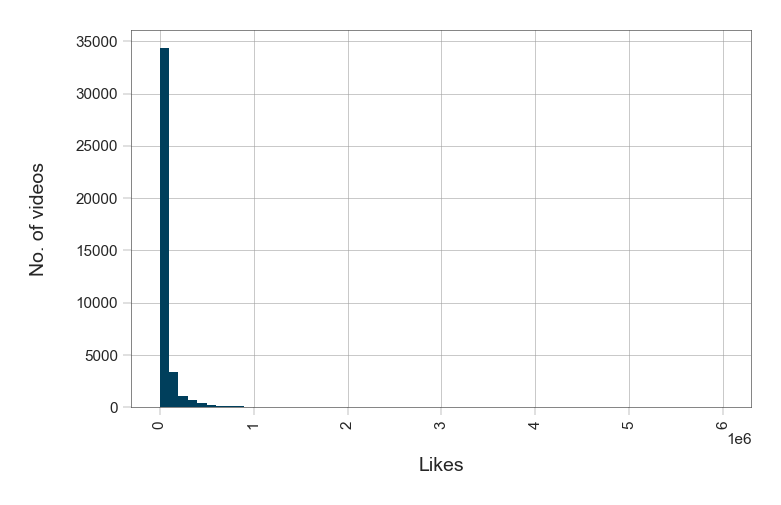

In [37]:
# Likes histogram
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(yt_df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


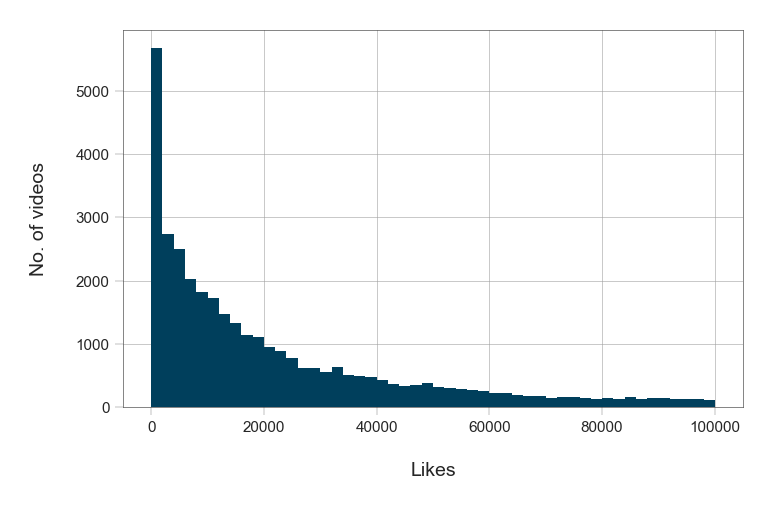

In [38]:
#We note that the vast majority of trending videos have between 0 and 100,000 likes.
#Let us plot the histogram just for videos with 1000,000 likes 
#or less to get a closer look at the distribution of the data
fig, ax = plt.subplots()
_ = sns.distplot(yt_df[yt_df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


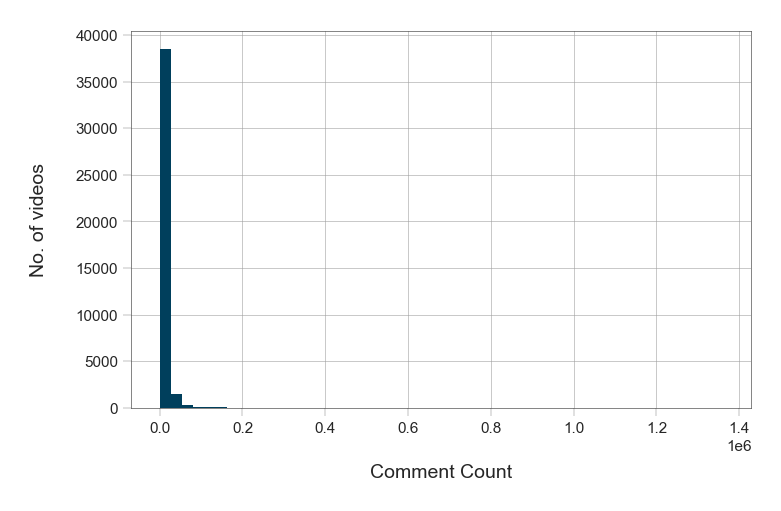

In [39]:
# Comment count histogram

fig, ax = plt.subplots()
_ = sns.distplot(yt_df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


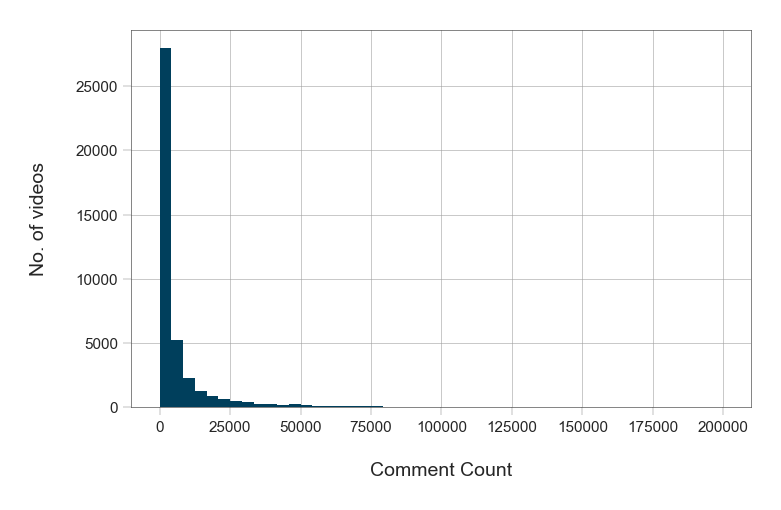

In [40]:
#Let's get a closer look by eliminating entries with comment count larger than 200000 comment

fig, ax = plt.subplots()
_ = sns.distplot(yt_df[yt_df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [42]:
# Description on non-numerical columns

yt_df.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902
top,j4KvrAUjn6c,17.21.12,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,200,30,203,50,1535,30,570


In [44]:
#we can see that there are 205 unique dates,
#which means that our dataset contains collected data about trending videos over 205 days.

grouped=yt_df.groupby('video_id')
groups=[]
wanted_group=[]
for key, item in grouped:
    groups.append(grouped.get_group(key))
for g in groups:
    if len(g['title'].unique()) !=1:
        wanted_group.append(g)
wanted_group[0]
        

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14266,0ufNmUyf2co,18.26.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,824,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14491,0ufNmUyf2co,18.27.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,746,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14706,0ufNmUyf2co,18.28.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14931,0ufNmUyf2co,18.29.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15175,0ufNmUyf2co,18.30.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,769,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15385,0ufNmUyf2co,18.31.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,778,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...


In [45]:
#How many trending video titles contain capitalized word?
# to do that we will add a collumn to the dataset whose value is True if video title has at least a capitalized word in it. and False otherwise


In [47]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
        else: 
            return False
yt_df['contains_capitalized_word']=yt_df['title'].apply(contains_capitalized_word)

In [48]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True


In [62]:
value_counts=yt_df['contains_capitalized_word'].value_counts()

In [63]:
value_counts


False    32966
True      7983
Name: contains_capitalized_word, dtype: int64

([<matplotlib.patches.Wedge at 0x293f0decdc8>,
 [Text(-0.900064417769117, 0.6323638540159775, ''),
  Text(0.9000644473722041, -0.6323638118809211, '')])

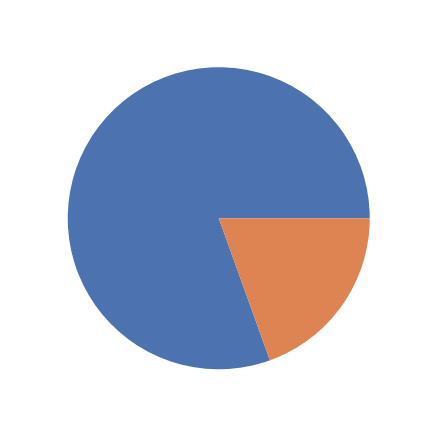

In [69]:
plt.pie(value_counts)


In [70]:
value_counts=value_counts.to_dict()

In [71]:
value_counts

{False: 32966, True: 7983}

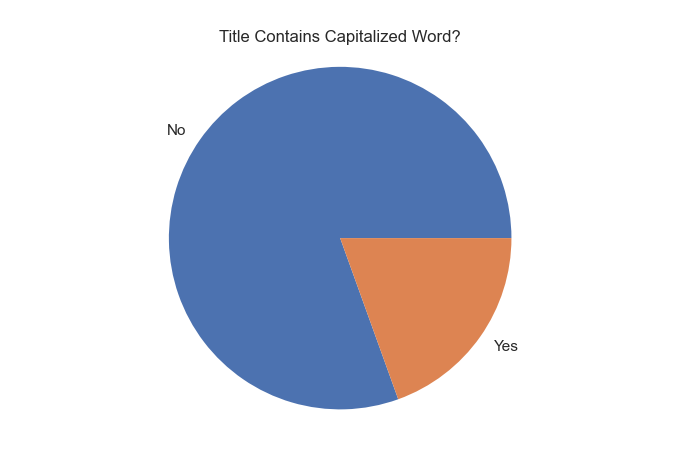

In [74]:
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           )
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [75]:
yt_df['contains_capitalized_word'].value_counts(normalize=True)

False   0.81
True    0.19
Name: contains_capitalized_word, dtype: float64

In [76]:
# we can se that 81% of trending video tilte contain at least a capitalized word.



In [77]:
# Video title lengths
# add another column to our dataset to represent the length of each video title,
# then plot the histogram of title length to get an idea about the lengths of trending video title

yt_df['title_length']=yt_df['title'].apply(lambda x: len(x))

In [78]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word,title_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,62
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24


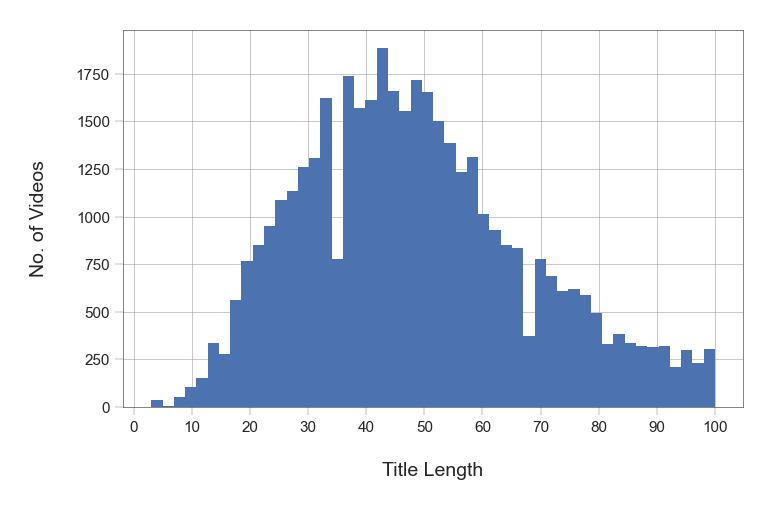

In [80]:
fig, ax =plt.subplots()
_=sns.distplot(yt_df['title_length'], kde=False, rug=False, hist_kws={'alpha':1}, ax=ax)
_=ax.set(xlabel='Title Length', ylabel='No. of Videos', xticks=range(0,110,10))

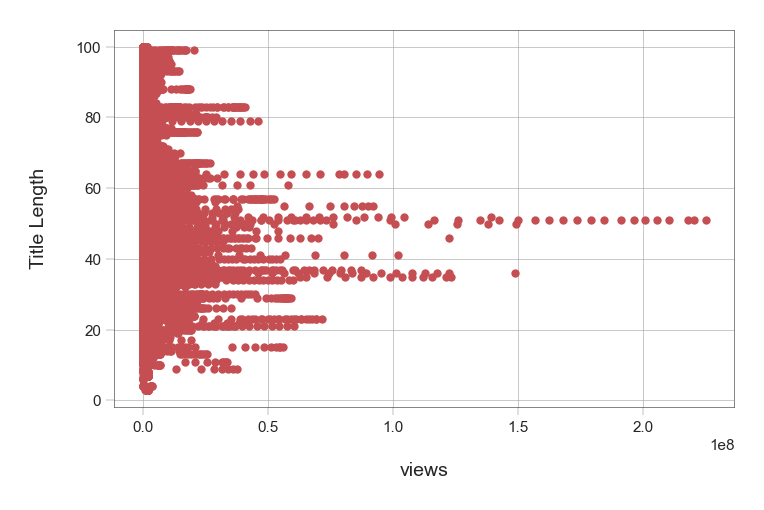

In [83]:
# scater plot between title length and number of views 
fig, ax =plt.subplots()
_=ax.scatter(x=yt_df['views'],y=yt_df['title_length'], color='r')
_=ax.set(xlabel='views', ylabel='Title Length')

In [85]:
# base on this we can see their is no relationship between the title length and the number of views/

# let see how the dataset variable are correlated with other:
# for example we would like to see how views and likes are correlated

yt_df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized_word,title_length
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03,0.07,0.02
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00,-0.01,-0.04
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00,0.05,-0.08
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00,-0.01,-0.03
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00,0.06,-0.07
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00,-0.01,0.03
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00,0.01,0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.01,-0.01
contains_capitalized_word,0.07,-0.01,0.05,-0.01,0.06,-0.01,0.01,-0.01,1.00,-0.10
title_length,0.02,-0.04,-0.08,-0.03,-0.07,0.03,0.00,-0.01,-0.10,1.00


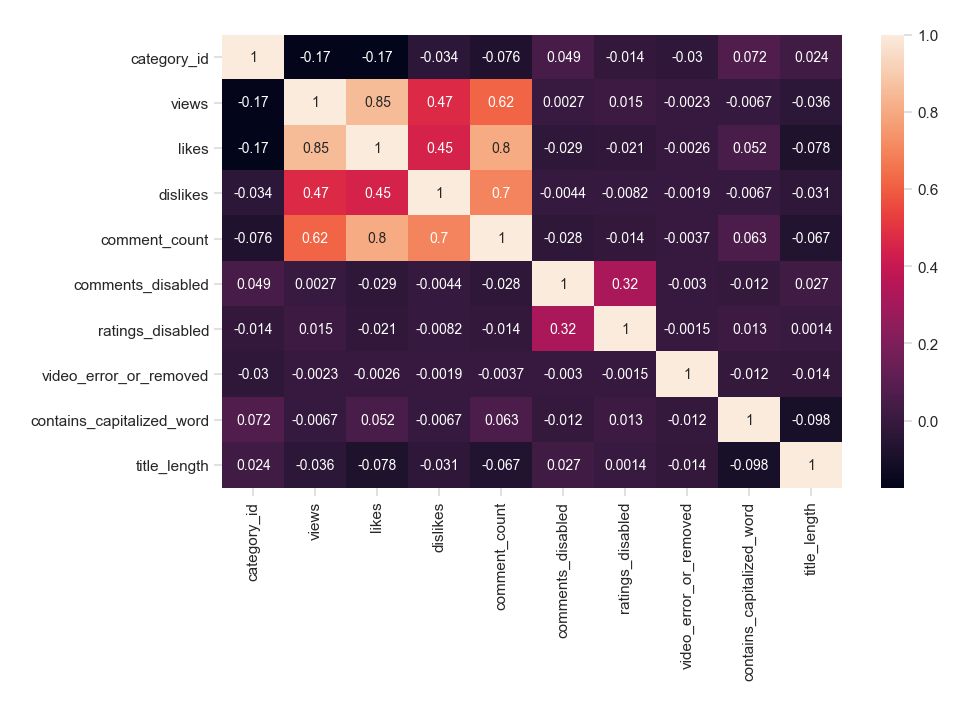

In [86]:
# there is some positive correlation between views and dislike, view and comment count, like and dislike
# we visulize the correlation table by using a heatmap

fig, ax = plt.subplots(figsize=(10,6))
_=sns.heatmap(yt_df.corr(), annot=True)

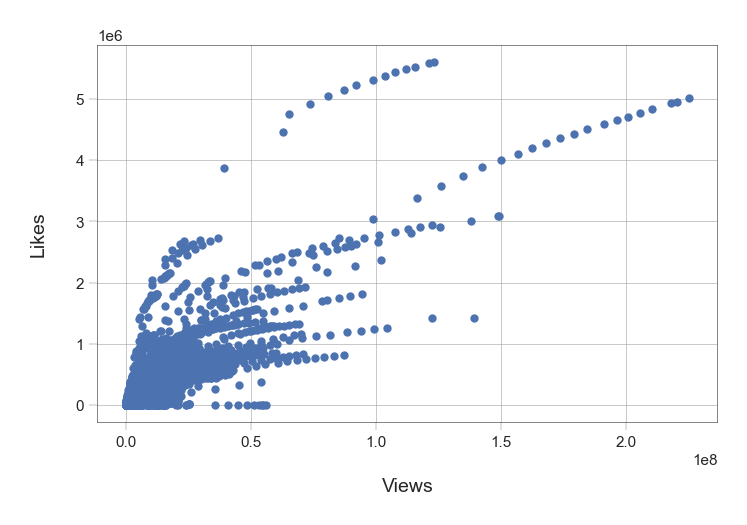

In [89]:
# the correlation table above say that views and likes are highly positive correlated. we verify that by ploting scatter plot between views and liks
fig, ax = plt.subplots()
_=plt.scatter(x=yt_df['views'],y=yt_df['likes'])
_=ax.set(xlabel='Views', ylabel='Likes')

In [90]:
# We cab see that views and likes are trully positively correlated.


In [92]:
# Most Common words in videos title
title_words=list(yt_df['title'].apply(lambda x : x.split()))
title_words = [x for y in title_words for x in y]

In [93]:
title_words

['WE',
 'WANT',
 'TO',
 'TALK',
 'ABOUT',
 'OUR',
 'MARRIAGE',
 'The',
 'Trump',
 'Presidency:',
 'Last',
 'Week',
 'Tonight',
 'with',
 'John',
 'Oliver',
 '(HBO)',
 'Racist',
 'Superman',
 '|',
 'Rudy',
 'Mancuso,',
 'King',
 'Bach',
 '&',
 'Lele',
 'Pons',
 'Nickelback',
 'Lyrics:',
 'Real',
 'or',
 'Fake?',
 'I',
 'Dare',
 'You:',
 'GOING',
 'BALD!?',
 '2',
 'Weeks',
 'with',
 'iPhone',
 'X',
 'Roy',
 'Moore',
 '&',
 'Jeff',
 'Sessions',
 'Cold',
 'Open',
 '-',
 'SNL',
 '5',
 'Ice',
 'Cream',
 'Gadgets',
 'put',
 'to',
 'the',
 'Test',
 'The',
 'Greatest',
 'Showman',
 '|',
 'Official',
 'Trailer',
 '2',
 '[HD]',
 '|',
 '20th',
 'Century',
 'FOX',
 'Why',
 'the',
 'rise',
 'of',
 'the',
 'robots',
 'won’t',
 'mean',
 'the',
 'end',
 'of',
 'work',
 'Dion',
 "Lewis'",
 '103-Yd',
 'Kick',
 'Return',
 'TD',
 'vs.',
 'Denver!',
 '|',
 "Can't-Miss",
 'Play',
 '|',
 'NFL',
 'Wk',
 '10',
 'Highlights',
 '(SPOILERS)',
 "'Shiva",
 'Saves',
 'the',
 "Day'",
 'Talked',
 'About',
 'Scene',
 'E

In [94]:
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

In [95]:
#Ignoring words like "the" and "of", 
#we can see that "-" and "|" symbols occured a lot in the 40949 trending video titles: 
#11452 times and 10663 times respectively.
#We notice also that words "Video", "Trailer", 
#"How", and "2018" are common in trending video titles; each occured in 1613-1901 video titles.

In [96]:
# let draw a word cloud for the title of trending video

import wordcloud

In [100]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))


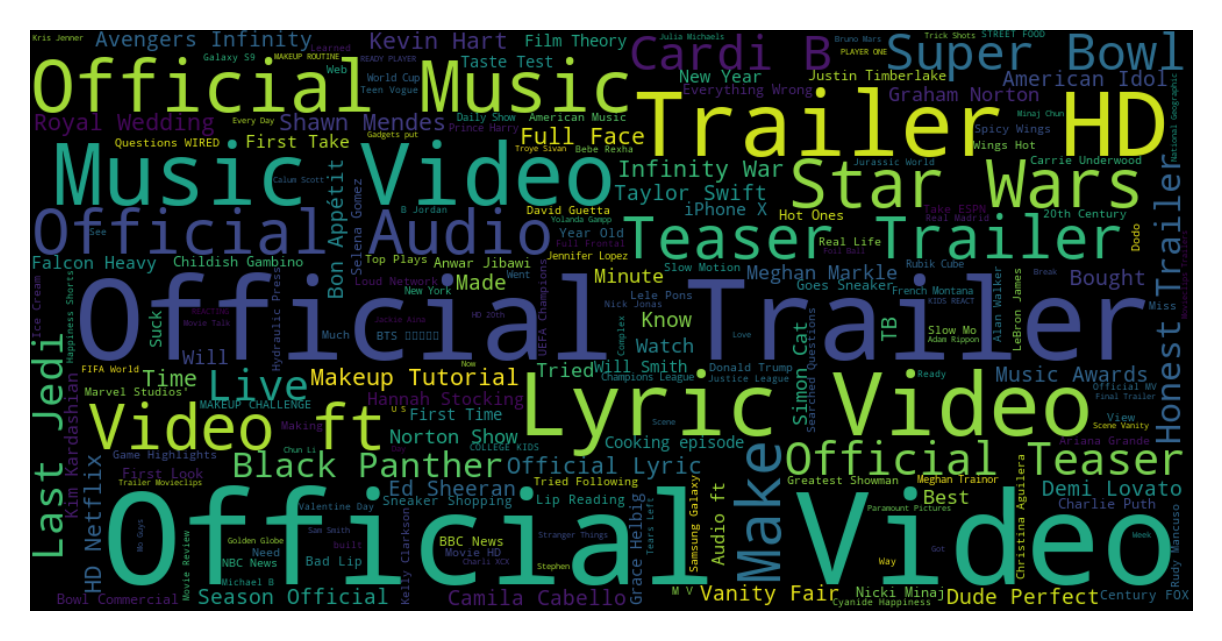

In [102]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [103]:
# Which channel have largest number of trending video?

cdf= yt_df.groupby('channel_title').size().reset_index(name='video_count')

In [104]:
cdf

,channel_title,video_count
0,12 News,2
1,1MILLION Dance Studio,33
2,1theK (원더케이),19
3,20th Century Fox,135
4,2CELLOS,2
...,...,...
2202,ワーナー ブラザース 公式チャンネル,6
2203,圧倒的不審者の極み!,12
2204,杰威爾音樂 JVR Music,29
2205,郭韋辰,2


In [105]:
cdf.sort_values('video_count', ascending=False)

,channel_title,video_count
555,ESPN,203
1785,The Tonight Show Starring Jimmy Fallon,197
1943,Vox,193
1271,Netflix,193
1804,TheEllenShow,193
...,...,...
1698,Taylor Alexander,1
788,Humble Design,1
1690,Tamar Chronicles,1
154,BTS Videos,1


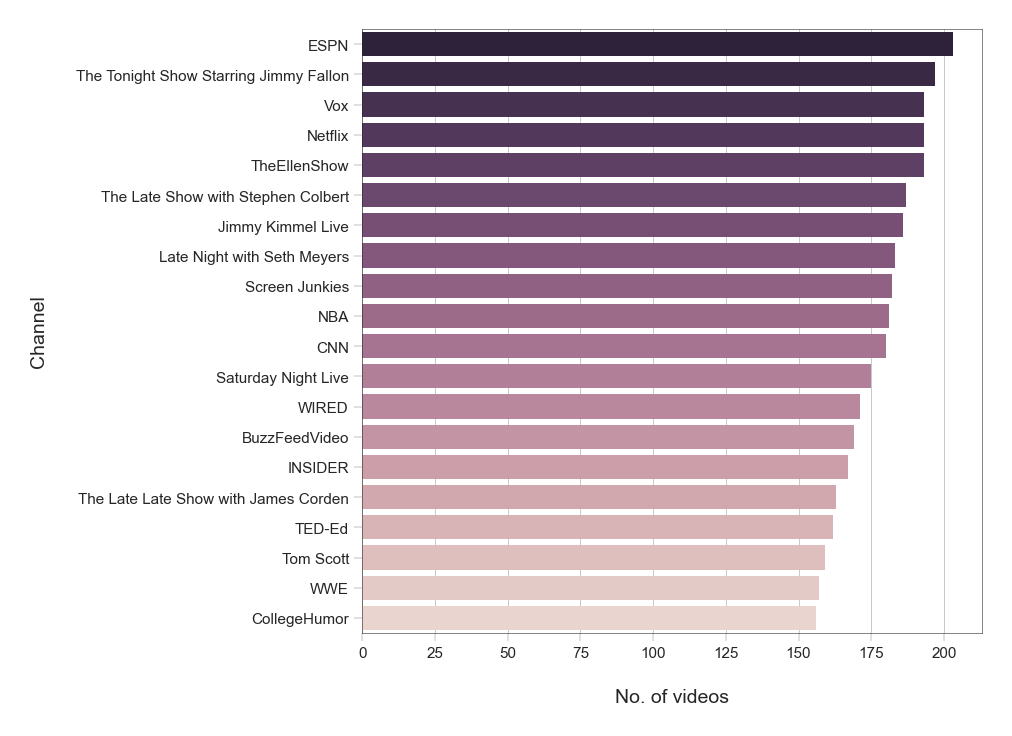

In [110]:
cdf = yt_df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [112]:
# WHich video category has the largest number of trending video
category_id=pd.read_json('D:\Data Analytics Real World Project Python\Youtube Trending Analysis/US_category_id.json')
category_id.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [116]:
categories=category_id['items']


In [117]:
categories

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [118]:
cat_dict={}
for cat in categories:
    cat_dict[int(cat['id'])]=cat['snippet']['title']

In [119]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [123]:
yt_df['category_name']=yt_df['category_id'].map(cat_dict)

In [124]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word,title_length,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34,NaN
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,62,NaN
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53,NaN
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32,NaN
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24,NaN


In [125]:
cdf=yt_df['category_id']

In [127]:
cdf.value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category_id, dtype: int64

In [130]:
df=cdf.value_counts()

In [131]:
df

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category_id, dtype: int64

In [134]:
df.reindex()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category_id, dtype: int64

In [135]:
df.plot

Text(0, 0.5, 'No of videos')

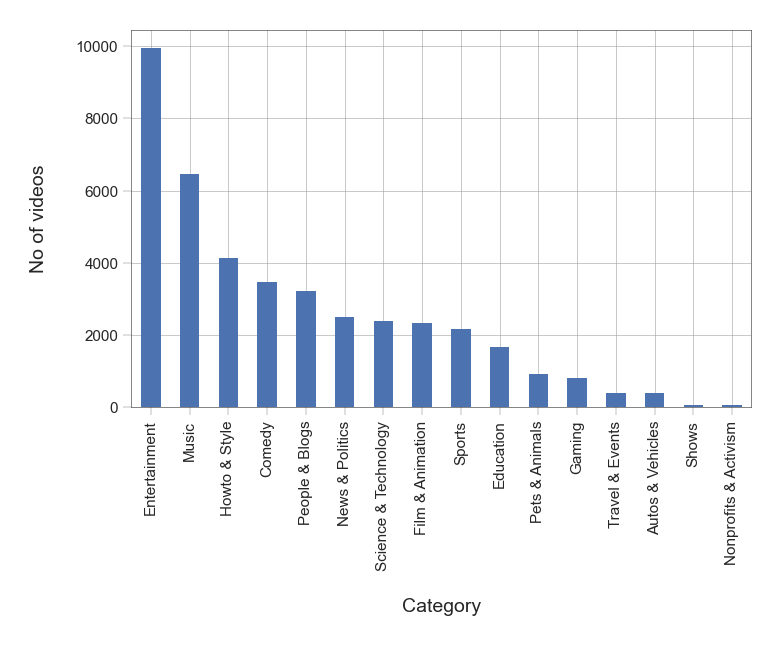

In [138]:
df.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('No of videos')

In [139]:
# we see that the Entertaiment category contain the largest number of trending videos.
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word,title_length,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34,NaN
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,62,NaN
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53,NaN
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32,NaN
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24,NaN


In [143]:
yt_df=yt_df.drop(columns='category_name')

KeyError: "['category_name'] not found in axis"

In [144]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word,title_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,62
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24


In [147]:
# Trending videos and their publishing time
# let get date and hour of publish time only

yt_df['publish_day']=yt_df['publish_time'].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))

In [148]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word,title_length,publish_day
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34,Mon
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,62,Mon
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53,Sun
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32,Mon
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24,Sun


In [149]:
yt_df['publishing_hour']=yt_df['publish_time'].apply(lambda x: x[11:13])

In [150]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word,title_length,publish_day,publishing_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34,Mon,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,62,Mon,07
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53,Sun,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32,Mon,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24,Sun,18


In [154]:
yt_df=yt_df.drop(columns='publish_time')

In [155]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word,title_length,publish_day,publishing_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34,Mon,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,62,Mon,07
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53,Sun,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32,Mon,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24,Sun,18


Text(0, 0.5, 'No. of videos')

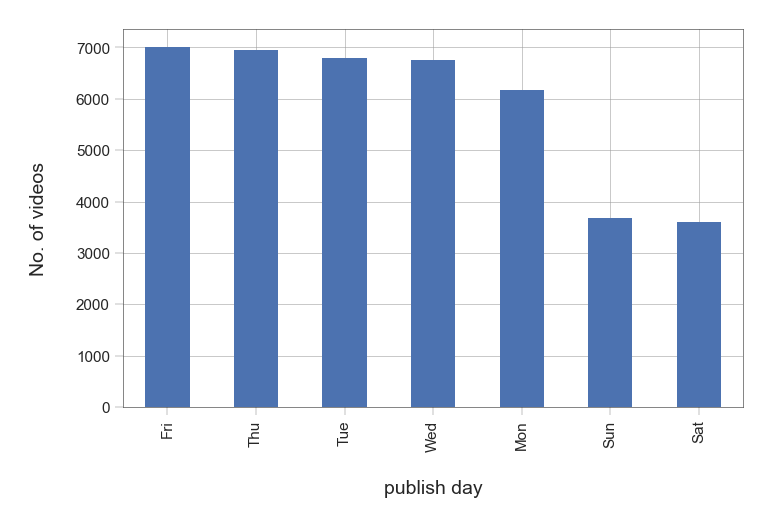

In [159]:
# now we can see which day of week had the largest number of trending videos

yt_df['publish_day'].value_counts().plot(kind='bar')
plt.xlabel('publish day')
plt.ylabel('No. of videos')

In [165]:
# we can see that the number of trending videos published on Sunday and Saturday are notice less than number of trending videos on other day of week

# now we use publish hour to see which publish hour had the largest number of trending video.

trending_hour=yt_df['publishing_hour'].value_counts()
trending_hour

16    3669
15    3483
17    3447
18    2889
14    2807
20    2136
19    2132
13    2105
21    2104
22    1959
12    1551
23    1495
00    1436
01    1318
04    1262
05    1253
03     944
02     936
11     856
08     790
07     700
09     605
10     541
06     531
Name: publishing_hour, dtype: int64

In [166]:
trending_hour.reset_index()

,index,publishing_hour
0,16,3669
1,15,3483
2,17,3447
3,18,2889
4,14,2807
5,20,2136
6,19,2132
7,13,2105
8,21,2104
9,22,1959


In [167]:
trending_hour.sort_index()

00    1436
01    1318
02     936
03     944
04    1262
05    1253
06     531
07     700
08     790
09     605
10     541
11     856
12    1551
13    2105
14    2807
15    3483
16    3669
17    3447
18    2889
19    2132
20    2136
21    2104
22    1959
23    1495
Name: publishing_hour, dtype: int64

In [168]:
trending_hour=trending_hour.sort_index()

In [169]:
trending_hour

00    1436
01    1318
02     936
03     944
04    1262
05    1253
06     531
07     700
08     790
09     605
10     541
11     856
12    1551
13    2105
14    2807
15    3483
16    3669
17    3447
18    2889
19    2132
20    2136
21    2104
22    1959
23    1495
Name: publishing_hour, dtype: int64

Text(0, 0.5, 'No. of Videos')

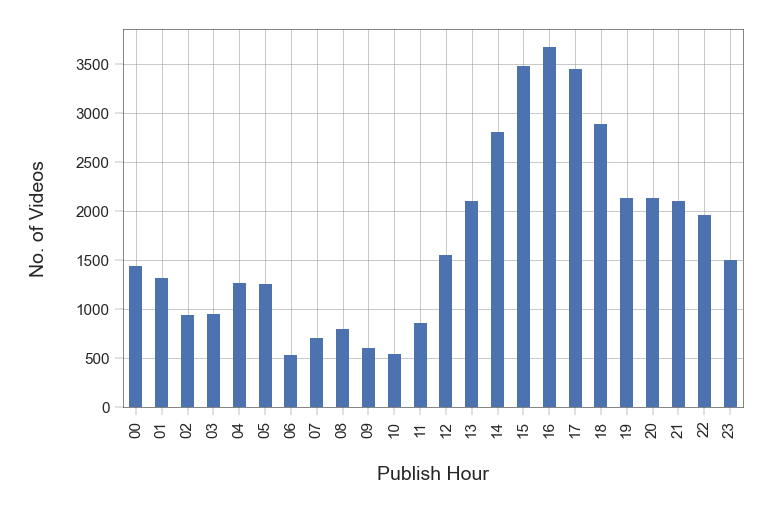

In [171]:
trending_hour.plot(kind='bar')
plt.xlabel('Publish Hour')
plt.ylabel('No. of Videos')

In [172]:
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized_word,title_length,publish_day,publishing_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34,Mon,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",False,62,Mon,07
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53,Sun,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32,Mon,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24,Sun,18


<AxesSubplot:ylabel='video_error_or_removed'>

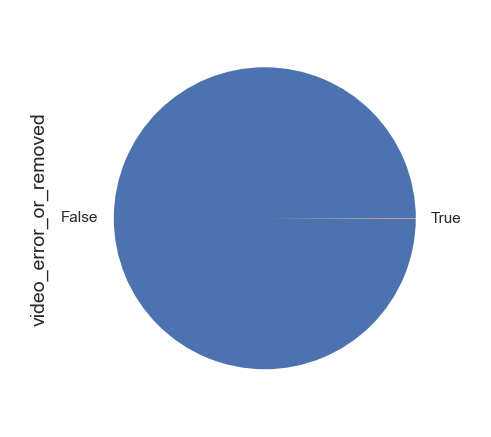

In [176]:
# How many trending videos have an error?
yt_df['video_error_or_removed'].value_counts().plot(kind='pie')


In [177]:
yt_df['video_error_or_removed'].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

In [178]:
# we can see that apprered on trending list there is a tiny portion (23 videos) with error or removed

# How many trending videos have their comments disable

yt_df['comments_disabled'].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

Text(0.5, 1.0, ' Comments Disable?')

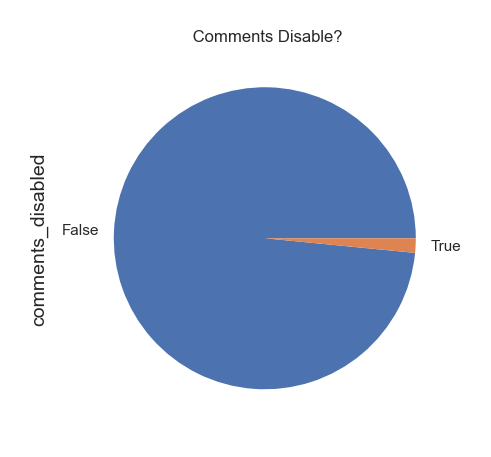

In [180]:
yt_df['comments_disabled'].value_counts().plot(kind='pie')
plt.title(' Comments Disable?')

In [181]:
# how many trending video have their rating disable

value_counts=yt_df['ratings_disabled'].value_counts().to_dict()

In [182]:
value_counts

{False: 40780, True: 169}

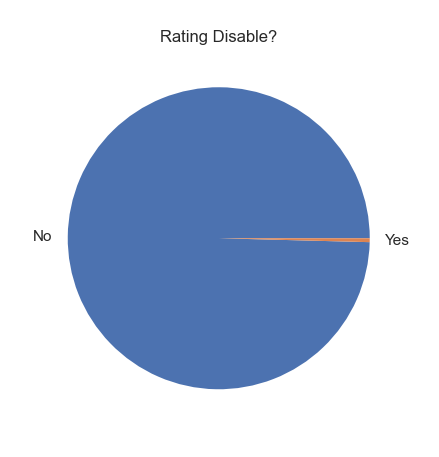

In [185]:
fig, ax=plt.subplots()
_=ax.pie([value_counts[False],value_counts[True]], labels=['No','Yes'])
_=ax.set_title('Rating Disable?')

In [191]:
# how many videos have both of comment and rating disable

len(yt_df[(yt_df['ratings_disabled'])==True & (yt_df['comments_disabled']==True)].index)

40359